In [1]:
from sideinfo import *
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal


In [23]:
def generate_data_MultiDim(job=0, n_samples=10000,data_vis=0,Dim=5):
    if job == 0: # Gaussian mixtures 
        X=np.zeros([n_samples,Dim])
        mu=np.zeros([2,Dim])
        Sigma=np.zeros([2,Dim])
        for i in range(Dim):
            X[:,i]=np.random.uniform(-1,1,size = n_samples)
        ## spicify the centers
        mu[0,:] += 0.5
        mu[1,:] -= 0.5
        Sigma[0,:] += 0.25
        Sigma[1,:] += 0.25
        var1=multivariate_normal(mean=mu[0,:], cov=np.diag(Sigma[0,:]))
        var2=multivariate_normal(mean=mu[1,:], cov=np.diag(Sigma[1,:]))
        
        pi1=((var1.pdf(X)+var2.pdf(X))*15).clip(max=1)
#         print(np.amax(pi1))
                   
        p = np.zeros(n_samples)
        h = np.zeros(n_samples)
               
        for i in range(n_samples):
            rnd = np.random.uniform()
            if rnd > pi1[i]:
                p[i] = np.random.uniform()
                h[i] = 0
            else:
                p[i] = np.random.beta(a = 0.3, b = 4)
                h[i] = 1
        return p, h, X
    if job == 1: # Linear trend
        pass
#         x1 = np.random.uniform(-1,1,size = n_samples)
#         x2 = np.random.uniform(-1,1,size = n_samples)
#         pi1 = 0.1 * (x1 + 1) /2 +  0.3 *(1-x2) / 2
        
#         p = np.zeros(n_samples)
#         h = np.zeros(n_samples)
         
#         for i in range(n_samples):
#             rnd = np.random.uniform()
#             if rnd > pi1[i]:
#                 p[i] = np.random.uniform()
#                 h[i] = 0
#             else:
#                 p[i] = np.random.beta(a = 0.3, b = 4)
#                 h[i] = 1
#         X = np.concatenate([[x1],[x2]]).T
        
#         if data_vis == 1:
#             fig = plt.figure()
#             ax1 = fig.add_subplot(121)
#             x_grid = np.arange(-1, 1, 1/100.0)
#             y_grid = np.arange(-1, 1, 1/100.0)
#             X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
#             pi1_grid =  0.1 * (X_grid + 1) /2 +  0.3 *(1-Y_grid) / 2
            
#             ax1.pcolor(X_grid, Y_grid, pi1_grid)
            
#             ax2 = fig.add_subplot(122)
#             alt=ax2.scatter(x1[h==1][1:50], x2[h==1][1:50],color='r')
#             nul=ax2.scatter(x1[h==0][1:50], x2[h==0][1:50],color='b')
#             ax2.legend((alt,nul),('50 alternatives', '50 nulls'))
            
#         return p, h, X
        
        
        
    if job == 2: # Gaussian mixture + linear trend
        pass
#         x1 = np.random.uniform(-1,1,size = n_samples)
#         x2 = np.random.uniform(-1,1,size = n_samples)
#         pi1 = ((mlab.bivariate_normal(x1, x2, 0.25, 0.25, -0.5, -0.2)+
#                mlab.bivariate_normal(x1, x2, 0.25, 0.25, 0.7, 0.5))/2).clip(max=1)        
#         pi1 = pi1 * 0.5 + 0.5*(0.5 * (x1 + 1) /2 +  0.3 *(1-x2) / 2)
        
#         p = np.zeros(n_samples)
#         h = np.zeros(n_samples)
               
#         for i in range(n_samples):
#             rnd = np.random.uniform()
#             if rnd > pi1[i]:
#                 p[i] = np.random.uniform()
#                 h[i] = 0
#             else:
#                 p[i] = np.random.beta(a = 0.3, b = 4)
#                 h[i] = 1
#         X = np.concatenate([[x1],[x2]]).T
        
#         if data_vis == 1:
#             fig = plt.figure()
#             ax1 = fig.add_subplot(121)
#             x_grid = np.arange(-1, 1, 1/100.0)
#             y_grid = np.arange(-1, 1, 1/100.0)
#             X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
#             pi1_grid = ((mlab.bivariate_normal(X_grid, Y_grid, 0.25, 0.25, -0.5, -0.2)+
#                mlab.bivariate_normal(X_grid, Y_grid, 0.25, 0.25, 0.7, 0.5))/2).clip(max=1)  * 0.5 + (0.5 * (0.5 * (X_grid + 1) /2 +  0.3 *(1-Y_grid) / 2))
#             ax1.pcolor(X_grid, Y_grid, pi1_grid)
            
#             ax2 = fig.add_subplot(122)
#             alt=ax2.scatter(x1[h==1][1:50], x2[h==1][1:50],color='r')
#             nul=ax2.scatter(x1[h==0][1:50], x2[h==0][1:50],color='b')
#             ax2.legend((alt,nul),('50 alternatives', '50 nulls'))
            
#         return p, h, X

In [24]:
x_Dim=5
p, h, x=generate_data_MultiDim(Dim=x_Dim, n_samples=10000)
n_samples=x.shape[0]
print("Num of alt: ", np.sum(h))
print("True null prop: ", 1-np.sum(h)/n_samples)

('Num of alt: ', 2915.0)
('True null prop: ', 0.70850000000000002)


In [25]:
dic_BH, t_BH = BH(p)
print("BH: num of dis, threshold:", dic_BH,t_BH)
dic_SBH, t_SBH, pi0_SBH = Storey_BH(p)
print("Storey_BH: num of dis, threshold, null esti", dic_SBH, t_SBH, pi0_SBH)

('BH: num of dis, threshold:', 1002, 0.0050019101109742108)
('Storey_BH: num of dis, threshold, null esti', 1182, 0.008197409882064419, 0.72016666666666662)


In [26]:
p.shape

(10000,)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
0.326953485608 0.0499999821186
0.326953485608 0.0298968870193
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400

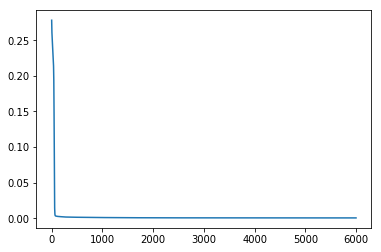

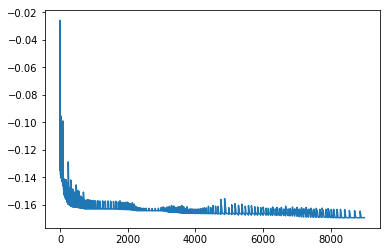

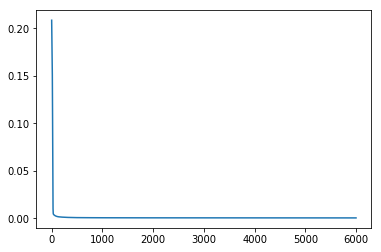

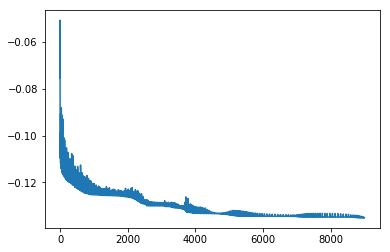

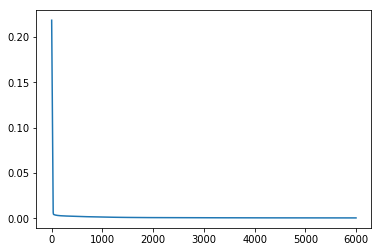

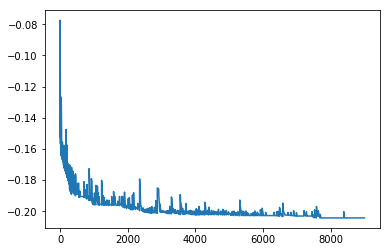

In [30]:
indices = np.random.permutation(x.shape[0])
A = [indices[:x.shape[0]/3], indices[x.shape[0]/3 : x.shape[0]/3*2], indices[x.shape[0]/3 * 2:]]
train = A
val = [A[1], A[2], A[0]]
test = [A[2], A[0], A[1]]
outputs = []
preds = []
gts = []
for i in range(3):
    network = get_network(num_layers = 10, dim = 5).cuda()
    optimizer = optim.Adagrad(network.parameters(), lr = 0.01)
    train_idx = train[i]
    val_idx = val[i]
    test_idx = test[i]
    
    #network init
    p_target = opt_threshold_multi(x[train_idx, :], p[train_idx], 10)
    #plt.figure()
    #plt.scatter(x, p_target)
    loss_hist = train_network_to_target_p(network, optimizer, x[train_idx], p_target, num_it = 6000, cuda= True, dim = 5)
    #optimizer = optim.Adagrad(network.parameters(), lr = 0.01, weight_decay=0.01)
    loss_hist2, s, s2 = train_network(network, optimizer, x[train_idx], p[train_idx], num_it = 9000, cuda = True, lambda2_ = 1e4, dim = 5)
    
    scale = get_scale(network, x[val_idx], p[val_idx], cuda = True, lambda2_ = 1e4, fit = True, dim=5)
    _ = get_scale(network, x[test_idx], p[test_idx], cuda = True, lambda2_ = 1e4, scale = scale, dim= 5)

    n_samples = len(x[test_idx])
    x_input = Variable(torch.from_numpy(x[test_idx].astype(np.float32).reshape(n_samples ,5))).cuda()
    p_input = Variable(torch.from_numpy(p[test_idx].astype(np.float32).reshape(n_samples ,1))).cuda()
    output = network.forward(x_input) * scale
    pred = (p_input < output).cpu().data.numpy()
    pred = pred[:,0].astype(np.float32)
    preds.append(pred)
    
    #x2 = np.arange(0, 5, 0.01)
    #n_samples = len(x2)
    #x_input = Variable(torch.from_numpy(x2.astype(np.float32).reshape(n_samples ,5))).cuda()
    #outputs.append(network.forward(x_input) * scale)
    gts.append(h[test_idx])
    
    
    plt.figure()
    plt.plot(loss_hist)
    plt.figure()
    plt.plot(loss_hist2)

In [31]:
rejs = [sum(item) for item in preds]
print rejs
print sum(rejs)

preds = np.concatenate(preds)
gts = np.concatenate(gts)
print sum(gts)
print sum(preds)
print sum(preds * gts)
print 1 - sum(preds * gts)/sum(preds)




[397.0, 424.0, 548.0]
1369.0
2915.0
1369.0
1310.0
0.0430971512053


In [8]:
p_target=opt_threshold_multi(x, p, k=10, intensity = 1)

In [9]:
pred=(p<p_target)*1
result_summary(h,pred)

('Num of alternatives:', 1065.0)
('Num of discovery:', 299)
('Num of true discovery:', 281.0)
('Actual FDR:', 0.06020066889632103)


In [14]:
network = get_network(num_layers = 5, dim = x_Dim)
optimizer = optim.Adagrad(network.parameters(), lr = 0.01)

In [24]:
print(BH(p))
print(Storey_BH(p))
#p_target = np.ones(x.shape) * Storey_BH(p)[1]
loss_hist = train_network_to_target_p(network, optimizer, x, p_target, num_it = 3000, dim = x_Dim)

(250, 0.0012453391320829807)
(265, 0.0014857075812447773, 0.88449999999999995)
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


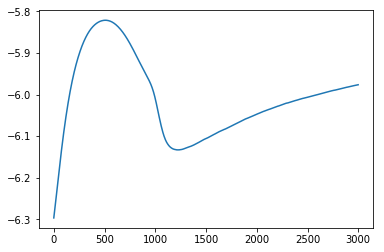

In [25]:
plt.plot(np.log(loss_hist))

In [26]:
optimizer = optim.Adagrad(network.parameters(), lr = 0.01, weight_decay=0.01)
loss_hist, val_hist, s, s2 = train_network_val(network, optimizer, x, p, num_it = 3000, dim = x_Dim, lambda2_=1e4)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


(Variable containing:
1.00000e-02 *
  3.4369
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-03 *
  1.6822
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-02 *
  4.8944
[torch.FloatTensor of size 1]
)


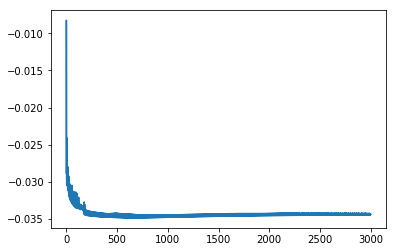

In [18]:
plt.plot(loss_hist)
plt.plot(val_hist)
print(s,s2, s2/s)

In [19]:
network.cpu()
n_samples = len(x)
x_input = Variable(torch.from_numpy(x.astype(np.float32).reshape(n_samples ,x_Dim)))
p_input = Variable(torch.from_numpy(p.astype(np.float32).reshape(n_samples ,1)))
output = network.forward(x_input)
pred = (p_input < output).data.numpy()
pred = pred[:,0].astype(np.float32)

In [20]:
x_input = Variable(torch.from_numpy(x.astype(np.float32).reshape(n_samples ,x_Dim)))
p_input = Variable(torch.from_numpy(p.astype(np.float32).reshape(n_samples ,1)))

output = network.forward(x_input)
pred = (p_input < output).data.numpy()
pred = pred[:,0].astype(np.float32)

print("Num of alternatives:",np.sum(h))
print("Num of discovery:",np.sum(pred))
print("Num of true discovery:",np.sum(pred * h))
print("Actual FDR:", 1-np.sum(pred * h) / np.sum(pred))

('Num of alternatives:', 1065.0)
('Num of discovery:', 347.0)
('Num of true discovery:', 313.0)
('Actual FDR:', 0.097982708933717633)


In [21]:
dic_BH, t_BH = BH(p,alpha=0.1)
print("BH: num of dis, threshold:", dic_BH,t_BH)
dic_SBH, t_SBH, pi0_SBH = Storey_BH(p,alpha=0.1)
print("Storey_BH: num of dis, threshold, null esti", dic_SBH, t_SBH, pi0_SBH)

('BH: num of dis, threshold:', 342, 0.003377951960033182)
('Storey_BH: num of dis, threshold, null esti', 370, 0.0041715288497786076, 0.88449999999999995)
